In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

import DataPreprocessing

## Dalitz Plot -> 3 Jets

In [2]:
##Obtain & process data NPY
me, mom = DataPreprocessing.npy('LO/MG_uuxg/3Jet_500000.npy', 'LO/LO_3_0.01_NJet/PS3_0.01_500000.npy', [], 1000, frac=0.1)

In [16]:
s12, s13, s23 = DataPreprocessing.mandel_creation(['3,4','3,5','4,5'], mom)
S = s12 + s13 + s23

(50000, 4)
(50000, 4)
(50000, 4)
[1000000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]


In [18]:
x1 = np.divide(s12, S)
x2 = np.divide(s13, S)
x3 = np.divide(s23, S)
print(x1)

x2i = np.linspace(0, 1, 500) #x1 coordinates
x3i = np.linspace(0, 1, 500) #x2 coordinates
X2i, X3i = np.meshgrid(x2i, x3i) #2d regularly spaced grid of coordinates.

[0.46517125 0.19960755 0.18402453 ... 0.02335827 0.1705608  0.6764714 ]


In [19]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x2, x3), me, (X2i, X3i), method='linear') 

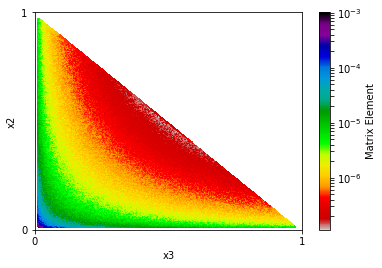

In [20]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r', norm = colors.LogNorm()) #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x3')

plt.savefig('DalitzPlot_MG')

## 2 Jets

In [24]:
me, mom = DataPreprocessing.csv('NLO/MG_uux/me_2Jet_1000000.csv','NLO/MG_uux/mom_2Jet_1000000.csv', [], 1000)

In [25]:
x1 = mom[:, 1]
x2 = mom[:, 2]

x1i = np.linspace(0, 1, 500) #x1 coordinates
x2i = np.linspace(0, 1, 500) #x2 coordinates
X1i, X2i = np.meshgrid(x1i, x2i) #2d regularly spaced grid of coordinates.

In [26]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x1, x2), me, (X1i, X2i), method='linear') 

Text(0.5,0,'Py')

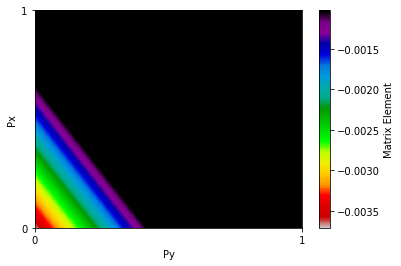

In [27]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('Px')
ax.set_xlabel('Py')